# EEG Chi Fitting

In [1]:
# This notebook uses py2.7 - because that's what FOOF is written in
#from __future__ import print_function, division

In [2]:
import sys
sys.path.append('/Users/tom/Documents/GitCode/SlopeFitOscs/')

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import RANSACRegressor

/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Import custom
from slf.plts.psd import *
from slf.core.utils import *
from slf.fit import *

In [5]:
# Import FOOOF
from fooof import FOOOF

In [6]:
# Load data from Jorge (Chicage group doing slope fitting)
dat = np.load('../data/data-for-tom.npy').item()

In [7]:
# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [9]:
# Set available subject numbers
subnums = [0, 71, 15, 22, 94, 31]

# Get group channel names (& clean up unicode)
gr_chans = dat[0]['channels']#[64:69]
gr_chans = [str(it) for it in gr_chans]
n_chans = len(gr_chans)

In [10]:
# Check subject details
# Note: I think group & age values are switched
for subj in subnums:
    print('Subj ', str(subj), '\t', dat[subj]['group'], '\t', dat[subj]['age'], )

Subj  0 	 29 	 DANE
Subj  71 	 64 	 MCI
Subj  15 	 44 	 DANE
Subj  22 	 24 	 DANE
Subj  94 	 74 	 MCI_Control
Subj  31 	 25 	 DANE


In [38]:
fm = FOOOF(bandwidth_limits=[1, 8], verbose=False)

#slvs_al = dict()
#slvs_os = dict()
slvs_fo = dict()

for subj in subnums:
    
    #slvs_al[subj] = []
    #slvs_os[subj] = []
    slvs_fo[subj] = []
    
    #for ch in range(64, 69):
    for ch in range(n_chans):
    
        freqs_ext, psd_ext = extract_psd(freqs, dat[subj][ch]['eyeso'], 3, 40)
        
        #slvs_al[subj].append(fsl_ransac_alph(freqs_ext, psd_ext))
        #slvs_os[subj].append(fsl_ransac_oscs(freqs_ext, psd_ext))
        
        fm.fit(np.squeeze(freqs_ext), np.squeeze(psd_ext), [freqs_ext.min(), freqs_ext.max()])
        slvs_fo[subj].append(-fm.background_params_[1])


                                          FOOOF - PSD MODEL                                          

                      The input PSD was modeled in the frequency range 3-40 Hz                      
                                 Frequency Resolution is 0.50 Hz 
                                  
                              Background Parameters (offset, slope):                                
                                           0.7759, 1.2239                                           

                                      2 oscillations were found:                                     
                                 CF:   9.98, Amp:  1.744, BW:  2.99                                 
                                 CF:  17.31, Amp:  0.806, BW:  8.00                                 

                                      R^2 of model fit is 0.9756                                     

                            Root mean squared error of model fit is 0.0926         

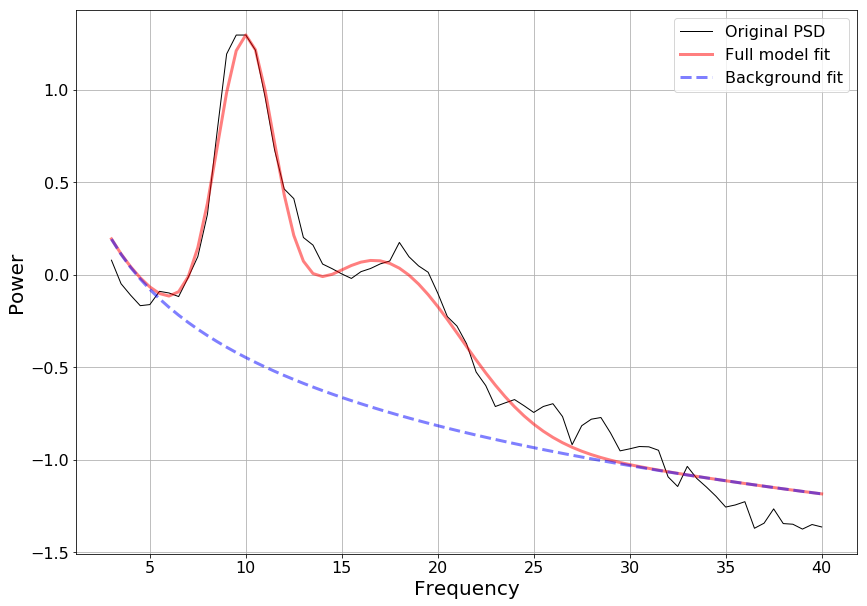

In [47]:
fm.model(freqs, dat[0][oc_ind]['eyesc'], [3, 40])
#fm.model(np.squeeze(freqs_ext), np.squeeze(psd_ext), [freqs_ext.min(), freqs_ext.max()])

In [40]:
# Get subj ages
ages = [dat[subj]['group'] for subj in subnums]
print(ages)

[29, 64, 44, 24, 74, 25]


In [41]:
# Set inds
fr_ind = gr_chans.index('FRONTAL')
ce_ind = gr_chans.index('CENTRAL')
oc_ind = gr_chans.index('OCCIPITAL')

# Grab slope vals from group electrodes
#frs = [slvs[subj][0] for subj in subnums]
#cen = [slvs[subj][2] for subj in subnums]
#occ = [slvs[subj][4] for subj in subnums]

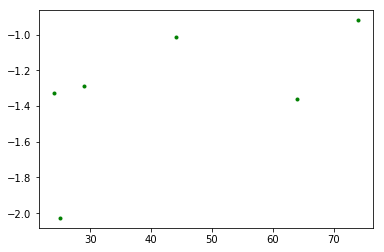

In [42]:
# Plot frontal
f = plt.figure()
#plt.plot(ages, [slvs_al[subj][fr_ind] for subj in subnums], 'b.')
#plt.plot(ages, [slvs_os[subj][fr_ind] for subj in subnums], 'r.')
plt.plot(ages, [slvs_fo[subj][fr_ind] for subj in subnums], 'g.')

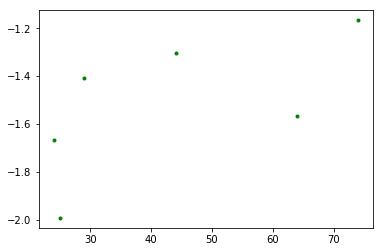

In [43]:
# Plot central
f = plt.figure()
#plt.plot(ages, [slvs_al[subj][ce_ind] for subj in subnums], 'b.')
#plt.plot(ages, [slvs_os[subj][ce_ind] for subj in subnums], 'r.')
plt.plot(ages, [slvs_fo[subj][ce_ind] for subj in subnums], 'g.')

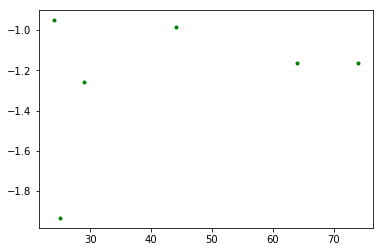

In [44]:
# Plot posterior
f = plt.figure()
#plt.plot(ages, [slvs_al[subj][oc_ind] for subj in subnums], 'b.')
#plt.plot(ages, [slvs_os[subj][oc_ind] for subj in subnums], 'r.')
plt.plot(ages, [slvs_fo[subj][oc_ind] for subj in subnums], 'g.')

In [45]:
# Check how the correlation compares between methods

from scipy.stats import pearsonr

#print('RAN-ALPH', pearsonr(ages, [slvs_al[subj][oc_ind] for subj in subnums]))
#print('RAN-OSCS', pearsonr(ages, [slvs_os[subj][oc_ind] for subj in subnums]))
print('FOOOF', pearsonr(ages, [slvs_fo[subj][oc_ind] for subj in subnums]))

FOOOF (0.29816581835684502, 0.56600516875764362)


In [21]:
# Quick Viz to check fits when methods diverge
ss = 71
cc = 2

freqs_ext, psd_ext = extract_psd(freqs, dat[ss][cc]['eyeso'], 3, 30)

# Note: intercepts are set manually for viz - they don't really matter here
sl_fit_al = slvs_al[ss][cc] * np.log10(freqs_ext) + 2.1
sl_fit_os = slvs_os[ss][cc] * np.log10(freqs_ext) + 0.6

NameError: name 'slvs_al' is not defined

In [ ]:
f = plt.figure()
plt.plot(np.log10(freqs_ext), sl_fit_al, ':m', label='RAN_ALPH')
plt.plot(np.log10(freqs_ext), sl_fit_os, ':g', label='RAN_OSCS')
plt.plot(np.log10(freqs_ext), np.log10(psd_ext), 'b', label='PSD')
plt.legend()

In [ ]:
# Compare eyes open / eyes closed: single subject, single channel
ss = 0
cc = 68
plt_psd_2(freqs, dat[ss][cc]['eyeso'], freqs, dat[ss][cc]['eyesc'])